# **Curso Python: Ejercicios semana 03**

### **12_Linear_regression**

>**Perform linear regressions of salinity vs temperature and dec vs salinity**

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import numpy as np
linear_r = pd.read_csv("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv")
linear_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

- **Salinidad vs Temperatura**

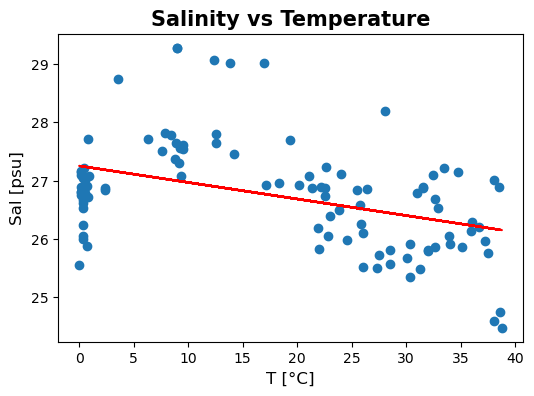

Slope: -0.028458717486946162


In [19]:
# REGRESIÓN LINEAL SIMPLE
x1 = linear_r['sal_psu']
y1 = linear_r['temp_c']
plt.scatter(x1, y1, label='original data')
plt.xlabel('T [°C]', fontsize = 12, )
plt.ylabel('Sal [psu]', fontsize = 12)
plt.title("Salinity vs Temperature", fontsize=15, fontweight='bold')
# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x1, y1)
# Plot linear regression 
plt.plot(x1, intercept + slope*x1, 'r', label='fitted line')
# set the figure size
plt.gcf().set_size_inches(6, 4)
# save the plot as a PDF file paper format 
folder_resultados = 'folder_resultados'
os.makedirs(folder_resultados, exist_ok=True)
plt.savefig(os.path.join(folder_resultados, 'Sal_T_regrlin.pdf'), dpi=300, bbox_inches='tight')
plt.show()
print('Slope:', slope)

In [20]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.17749929096684752
p_value: 6.879907520531154e-06
slope: -0.028458717486946162
intercept: 27.25200067150795


In [22]:
# REGRESIÓN OLS
x1 = linear_r['sal_psu']
y2 = linear_r['temp_c']
x1 = sm.add_constant(x1)
# Fit the Ordinary2 Least Squares (OLS) linear regression model
model = sm.OLS(y2, x1).fit()
# Display2 the model summary2
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.170   
Dependent Variable: temp_c           AIC:                264.7839
Date:               2025-08-26 15:16 BIC:                270.1108
No. Observations:   106              Log-Likelihood:     -130.39 
Df Model:           1                F-statistic:        22.44   
Df Residuals:       104              Prob (F-statistic): 6.88e-06
R-squared:          0.177            Scale:              0.69865 
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
const        27.2520    0.1320  206.4122  0.0000  26.9902  27.5138
sal_psu      -0.0285    0.0060   -4.7375  0.0000  -0.0404  -0.0165
-----------------------------------------------------------------
Omnibus:              10.808       Durbin-Watson:          0.642 
Prob(Omnibus):        

In [23]:
print("\n=== MODEL INTERPRETATION ===\n")
# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model.")
print(f"R² = {r2:.3f}\n{fit_quality}")
# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor
print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")
# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")
# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.177
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 27.2520, p = 0.0000 → ✔️ Significant (p < 0.05)
- sal_psu: Coef = -0.0285, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (sal_psu): -0.0285, p = 0.0000 → ✔️ Significant

Standard Error of the model: 0.8359


- **DIC vs Salinidad**

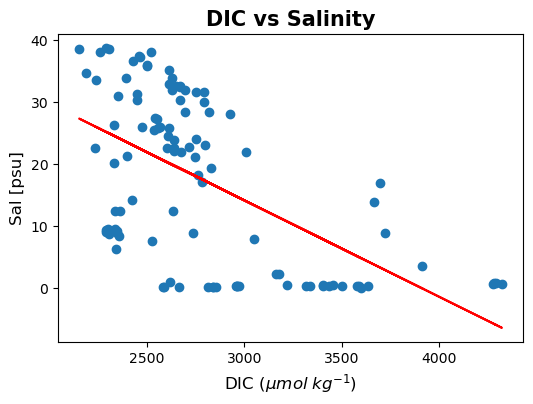

Slope: -0.015537057058518267


In [24]:
# REGRESIÓN LINEAL SIMPLE
x2 = linear_r['dic_micromol_kg']
y2 = linear_r['sal_psu']
plt.scatter(x2, y2, label='original data')
plt.xlabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12, )
plt.ylabel('Sal [psu]', fontsize = 12)
plt.title("DIC vs Salinity", fontsize=15, fontweight='bold')
# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
# Plot linear regression 
plt.plot(x2, intercept + slope*x2, 'r', label='fitted line')
# set the figure size
plt.gcf().set_size_inches(6, 4)
# save the plot as a PDF file paper format 
folder_resultados = 'folder_resultados'
os.makedirs(folder_resultados, exist_ok=True)
plt.savefig(os.path.join(folder_resultados, 'DIC_Sal_regrlin.pdf'), dpi=300, bbox_inches='tight')
plt.show()
print('Slope:', slope)

In [25]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.32710473310227767
p_value: 1.51441040237653e-10
slope: -0.015537057058518267
intercept: 60.80437362978961


In [29]:
# REGRESIÓN OLS
x2 = linear_r['dic_micromol_kg']
y2 = linear_r['sal_psu']
x2 = sm.add_constant(x2)
#Fit the Ordinary2 Ly2st Squares (OLS) linear regression model
model = sm.OLS(y2, x2).fit()
# Display2 the modey2summary2
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.321   
Dependent Variable: sal_psu          AIC:                814.8235
Date:               2025-08-26 15:21 BIC:                820.1504
No. Observations:   106              Log-Likelihood:     -405.41 
Df Model:           1                F-statistic:        50.56   
Df Residuals:       104              Prob (F-statistic): 1.51e-10
R-squared:          0.327            Scale:              125.27  
-----------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
const             60.8044   6.2099  9.7915 0.0000 48.4899 73.1189
dic_micromol_kg   -0.0155   0.0022 -7.1103 0.0000 -0.0199 -0.0112
-----------------------------------------------------------------
Omnibus:               60.706       Durbin-Watson:          0.538
Prob(Omnibus):         0.00

In [30]:
print("\n=== MODEL INTERPRETATION ===\n")
# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model.")
print(f"R² = {r2:.3f}\n{fit_quality}")
# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor
print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")
# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")
# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.327
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 60.8044, p = 0.0000 → ✔️ Significant (p < 0.05)
- dic_micromol_kg: Coef = -0.0155, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (dic_micromol_kg): -0.0155, p = 0.0000 → ✔️ Significant

Standard Error of the model: 11.1923
